In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf


In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split 
from tensorflow.keras import layers,losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [7]:
28*28

784

In [18]:
reducedDimension = 64

class AutoEncoder(Model):

    def __init__(self,reducedDimension,originalSize) -> None:
        super(AutoEncoder,self).__init__()
        self.reducedDimension = reducedDimension
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(reducedDimension, activation = 'relu'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(originalSize[0]*originalSize[1],activation='sigmoid'),
            layers.Reshape(originalSize),
        ])
    def call(self,X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded
        

# class Decoder:
#     def __init__(self,originalSize) -> None:
#         self.model = tf.keras.Sequential([
#             layers.Dense(originalSize[0]*originalSize[1],activation='sigmoid'),
#             layers.Reshape(originalSize),
#         ])
#     def decode(self,encodedImg):
#         return  self.model(encodedImg)
        


In [5]:
(X_train , _),(X_test, _) = mnist.load_data()

X_train,X_val = X_train[:-10000],X_train[-10000:]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_val = X_val.astype('float32')/255

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

11490434/11490434 [==============================] - 5s 0us/step
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


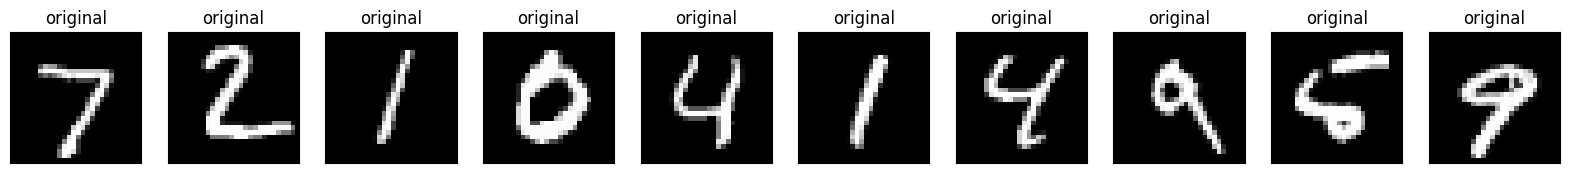

In [6]:
n = 10

plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_test[i])
    plt.title('original')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [19]:
autoEncoder = AutoEncoder(reducedDimension,X_test[0].shape)

In [21]:
autoEncoder.compile(optimizer='adam',loss=losses.MeanSquaredError())


In [22]:
autoEncoder.fit(X_train,X_train,
                epochs=10,
                shuffle=True,
                validation_data=(X_val,X_val)
                )

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0271 - val_loss: 0.0115
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0083 - val_loss: 0.0064
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0056 - val_loss: 0.0052
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 8/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.004

In [23]:
encodedImgs = autoEncoder.encoder(X_test).numpy()
decodedImgs = autoEncoder.decoder(encodedImgs).numpy()



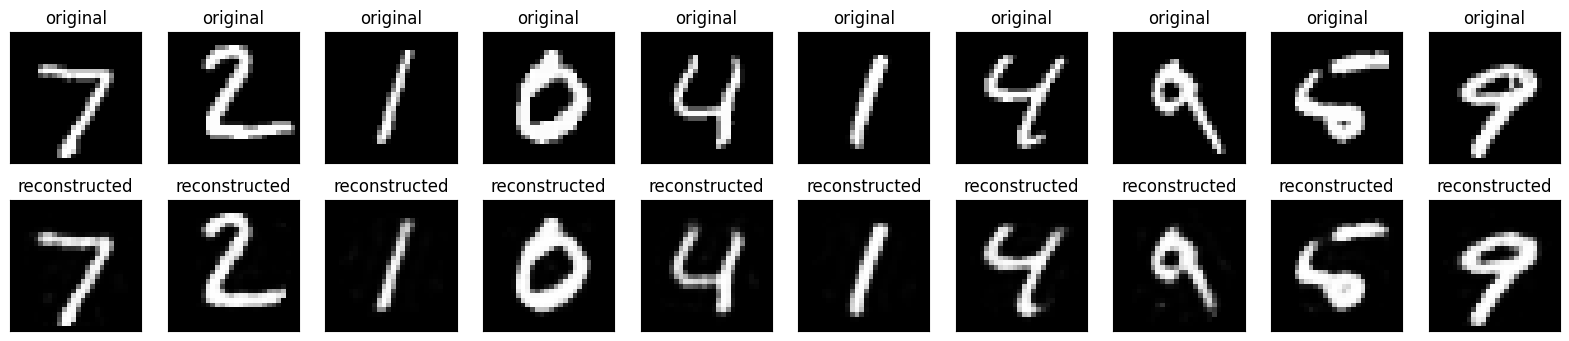

In [24]:
n = 10

plt.figure(figsize=(20,4))
for i in range(n):
    # original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_test[i])
    plt.title('original')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstructed
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decodedImgs[i])
    plt.title('reconstructed')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



In [2]:
print(tf.config.list_physical_devices())


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
